In [106]:
import geopandas as gpd
import shutil

from osgeo import gdal, gdalnumeric, ogr, osr
from gdalconst import *
from PIL import Image, ImageDraw
import os
import numpy as np
import subprocess


%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from library._04_geoprocess_cities import clip_raster

#### Create individual shapefiles of each country from shapefile of all countries
* load shapefile of all admin areas / countries as geodataframe
* filter out countries not internationally recognized
* loop through rows of geodataframe and save each row as a country-specific shapefile

In [116]:
# load shapefile of all admin areas / countries as geodataframe
gdf = gpd.read_file('data/geo/countries/countries_nf2.shp'); gdf.head(3)

# filter out countries not internationally recognized
country_filter1 = gdf['WB_A3'] != '-99'
gdf = gdf.drop_duplicates(subset='WB_A3')
gdf = gdf[country_filter1][country_filter2].set_index('WB_A3')

# create path to write shapefiles to
cwd = os.path.abspath('')
countries_dir = cwd + '/data/geo/countries/ungrouped'

# remove pre-existing directory and shapefiles
if os.path.exists(countries_dir):
    shutil.rmtree('data/geo/countries/ungrouped')

# create directory to write individual country shapefiles to
if not os.path.exists(countries_dir):
    os.makedirs(countries_dir)

# loop through rows of geodataframe and save each row as a country-specific shapefile
countries = gdf.index.values
for country in countries:
    gdf_country = gpd.GeoDataFrame(gdf.loc[country]).transpose()
    path = countries_dir + '/' + country + '.shp'
    gdf_country.to_file(path)

,ADMIN,CONTINENT,ISO_A3,REGION_UN,REGION_WB,SUBREGION,geometry
WB_A3,,,,,,,
ABW,Aruba,North America,ABW,Americas,Latin America & Caribbean,Caribbean,POLYGON ((-69.99693762899992 12.57758209800004...
AFG,Afghanistan,Asia,AFG,Asia,South Asia,Southern Asia,"POLYGON ((71.04980228700009 38.40866445000009,..."
AGO,Angola,Africa,AGO,Africa,Sub-Saharan Africa,Middle Africa,(POLYGON ((11.73751945100014 -16.6925779829998...


#### Generate city boundaries
* Clip master raster from 2013 by each country shapefile, creating country-specific rasters
* Use subprocess module to run gdal commands in terminal to do this
* Polygonize each country raster
* Select subset of polygons that have light intensity greater than selected thresh
* Union remaining polygons to get contiguous city boundaries
* Intersect with populated places to eliminate non-key cities
* Save outputs to cities directory

#### 

In [ ]:
# create individual shapefiles of each country from shapefile of all countries
# process: load shapefile as geodataframe
# filter out countries not internationally recognized
# loop through rows of geodataframe and save each row - which represents country - to directory





In [ ]:
# load shapefile as

In [14]:
# create cities directory to write cities boundary data to
cities_dir = cwd + '/data/geo/cities'
if not os.path.exists(cities_dir):
    os.makedirs(cities_dir)

In [ ]:
# 
input_shp = cwd + '/Users/peter/Dropbox/ds/gh/metis_projects/05-final/test/eth.shp'
input_tif = '/Users/peter/Dropbox/ds/gh/metis_projects/05-final/test/_1992.tif'
output_tif = '/Users/peter/Dropbox/ds/gh/metis_projects/05-final/test/output.tif'

In [133]:
# use this in the for loop to build path to io files: input_shp = os.path.abspath('test') + '/eth.shp'; input_shp
subprocess.check_call(['gdalwarp', '-dstnodata', '255', '-q', '-cutline', input_shp, '-crop_to_cutline', '-of', 'GTiff', input_tif, output_tif])

0

In [2]:
pwd)

NameError: name 'pwd' is not defined

'/Users/peter/Dropbox/ds/gh/metis_projects/05-final'

In [2]:
# clip raster with country shapefile
rast = gdal.Open('_1992.tif', GA_ReadOnly)
shp_path = 'data/geo/countries/eth.shp'
eth = clip_raster(rast, shp_path); eth

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ..., 
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 25559,
 7214,
 [32.98979984500011,
  0.0083333333,
  0.0,
  14.879532166000061,
  0.0,
  -0.0083333333])

In [196]:
pixel_vals = eth[0].flatten()  # flatten pixels

def filter_nodata(vals, no_data_val):  # filter function to remove zeros and nodata values from numpified raster values
    return vals != no_data_val
bool_arr_1 = np.array([filter_nodata(val, 255) for val in pixel_vals])
pixel_vals_nd_1 = pixel_vals[bool_arr_1]

bool_arr_2 = np.array([filter_nodata(val, 0) for val in pixel_vals_nd_1]) 
pixel_vals_nd_2 = pixel_vals_nd_1[bool_arr_2]

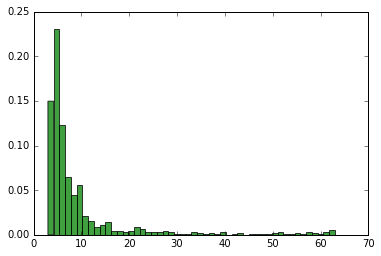

In [198]:
# see what resulting histogram of data looks like
n, bins, patches = plt.hist(pixel_vals_nd_2, 50, normed=1, facecolor='green', alpha=0.75)

In [166]:
from scipy.stats import expon
import math

In [200]:
np.mean(pixel_vals_nd_2)

9.6963288108539505

In [212]:
# fit exponential curve to data, inspect raster data in qgis
# see what percent of non-zero pixels constitute cities at given cutoff threshold
params = expon.fit(pixel_vals_nd_2)
the_mean = params[1]
the_lambda = 1 / the_mean
thresh = 25
1 - math.exp(-thresh*the_lambda)

0.9760881747105427